In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
import os
from langchain_openai import ChatOpenAI
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
llm=ChatOpenAI(model="gpt-4o-mini")
result=llm.invoke("What is the capital of France?")
result


AIMessage(content='The capital of France is Paris.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 14, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CUoi9P8BNiwp6KS136quUYzXp3SkN', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--551ec298-212e-4eb4-b496-24509e6a4b34-0', usage_metadata={'input_tokens': 14, 'output_tokens': 7, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display

#Graph State
class State(TypedDict):
    topic:str
    characters:str
    settings:str
    premises:str
    story_intro:str

In [6]:
#Nodes

def generate_characters(state:State):
    msg=llm.invoke(f"Create two character names and breif traits for a story about {state["topic"]}")
    return {"characters":msg.content}

def generate_settings(state:State):
    """Generate settings for the story"""
    msg=llm.invoke(f"Generate the settings for the story about {state["topic"]}")
    return {"settings":msg.content}

def generate_premise(state:State):
    """Generate the premise for the Story"""
    msg=llm.invoke(f"Generate a premise for the Story about {state['topic']}" )
    return {"premises":msg.content}

def combine_elements(state:State):
    """Combine all elements or bole toh Nodes together """
    msg=llm.invoke(
          f"Write a short story introduction using these elements: \n"
          f"Characters: {state['characters']}\n"
          f"Settings: {state["settings"]}\n"
          f"Premise:  {state["premises"]}"

    )
    return {"story_intro":msg.content}

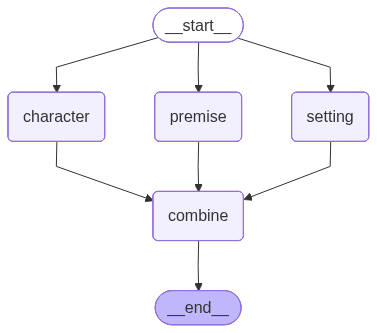

In [7]:
#Build the graph

graph=StateGraph(State)

graph.add_node("character",generate_characters)
graph.add_node("setting",generate_settings)
graph.add_node("premise",generate_premise)
graph.add_node("combine",combine_elements)


#edges
graph.add_edge(START,"character")
graph.add_edge(START,"setting")
graph.add_edge(START,"premise")

graph.add_edge("character","combine")
graph.add_edge("setting","combine")
graph.add_edge("premise","combine")
graph.add_edge("combine",END)

#Compile and Run
compiled_graph=graph.compile()
graph_image=compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [8]:
#Run the Graph
state={"topic":"Transformers and Ben 10 Ultimate ALien working together for a fiht against Doraemon and Ninja Hattori"}

result=compiled_graph.invoke(state)
result

{'topic': 'Transformers and Ben 10 Ultimate ALien working together for a fiht against Doraemon and Ninja Hattori',
 'characters': "Sure! Here are two character names along with brief traits for your crossover story:\n\n### Character 1: **RumbleBolt**\n- **Species**: Transformer\n- **Alt-Form**: High-tech armored motorcycle\n- **Traits**: RumbleBolt is a swift and agile Autobot known for his speed and reflexes. He has a playful yet courageous spirit, often using humor to lighten tense situations. He is a skilled strategist in battle, able to quickly assess weaknesses in his opponents. RumbleBolt values teamwork and often encourages his allies during fights, believing that together they can overcome any challenge. Despite his light-hearted demeanor, he possesses a fearless heart when it comes to protecting his friends.\n\n### Character 2: **Max Tennyson**\n- **Species**: Human (Ben 10 Ultimate Alien)\n- **Traits**: A brave and resourceful young hero, Max is Ben Tennyson's cousin who has 

In [9]:
print(result["story_intro"])

### **Transformers vs. Doraemon: Ultimate Alliance**

In the heart of a sprawling futuristic metropolis, where neon lights danced against the night sky and the hum of advanced technology echoed through the streets, RumbleBolt revved his engines, ready for another day’s adventure. The agile Autobot transformed effortlessly into his sleek motorcycle form, zipping through the throngs of pedestrians and weaving past the towering skyscrapers that seemed to touch the stars. His humorous banter spilled from his speakers, lightening the mood as he navigated the urban jungle. “Watch out world, RumbleBolt is on the fast track to saved!” he quipped, eliciting smiles from onlookers.

Meanwhile, somewhere deep beneath the roots of an ancient tree, Max Tennyson was adjusting the settings on his Omnitrix amidst the high-tech chaos of the Autobots' secret base. As Ben's cousin, Max had inherited the legacy of heroism, and he felt the weight of expectations on his shoulders. Yet today felt different—a 